In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Download the data
!wget -nc https://lazyprogrammer.me/course_files/exercises/diabetes.csv

--2021-07-10 10:10:57--  https://lazyprogrammer.me/course_files/exercises/diabetes.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/csv]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2021-07-10 10:10:57 (28.9 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [7]:
# Load data into pandas df and check columns

data_df = pd.read_csv('diabetes.csv')
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
# Binary classification: we have two possible categories
# 1 = Diabetes, 0 = No diabetes

print(data_df['Outcome'])

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [12]:
# Create target and feature dataframes to extract arrays from

target_df = data_df['Outcome']
feature_df = data_df.drop(columns=['Outcome'])

In [15]:
# Train test split, and record the training data shape

X_train, X_test, y_train, y_test = train_test_split(feature_df.values, target_df.values, test_size=0.33)
N, D = X_train.shape

In [19]:
# Scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Create the PyTorch classification model

model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [22]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [23]:
# Convert data into torch tensors

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test  = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [24]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # Zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss.item():.4f}')

Epoch 50/1000, Train Loss: 0.5937, Test Loss: 0.5937
Epoch 100/1000, Train Loss: 0.5700, Test Loss: 0.5700
Epoch 150/1000, Train Loss: 0.5526, Test Loss: 0.5526
Epoch 200/1000, Train Loss: 0.5397, Test Loss: 0.5397
Epoch 250/1000, Train Loss: 0.5296, Test Loss: 0.5296
Epoch 300/1000, Train Loss: 0.5216, Test Loss: 0.5216
Epoch 350/1000, Train Loss: 0.5149, Test Loss: 0.5149
Epoch 400/1000, Train Loss: 0.5092, Test Loss: 0.5092
Epoch 450/1000, Train Loss: 0.5043, Test Loss: 0.5043
Epoch 500/1000, Train Loss: 0.5001, Test Loss: 0.5001
Epoch 550/1000, Train Loss: 0.4965, Test Loss: 0.4965
Epoch 600/1000, Train Loss: 0.4933, Test Loss: 0.4933
Epoch 650/1000, Train Loss: 0.4906, Test Loss: 0.4906
Epoch 700/1000, Train Loss: 0.4883, Test Loss: 0.4883
Epoch 750/1000, Train Loss: 0.4863, Test Loss: 0.4863
Epoch 800/1000, Train Loss: 0.4845, Test Loss: 0.4845
Epoch 850/1000, Train Loss: 0.4830, Test Loss: 0.4830
Epoch 900/1000, Train Loss: 0.4817, Test Loss: 0.4817
Epoch 950/1000, Train Loss: 0

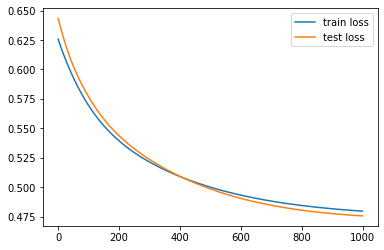

In [25]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [26]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.7724, Test acc: 0.7795
